In [5]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    Then renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

In [6]:
import matplotlib
matplotlib.__version__

'3.1.1'

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
sns.set_style("ticks")

CONF_ID = "param__header__all__config_id"

df01 = pd.read_csv("/home/idli/results/analysis/result_ec_metrics_full.csv")
df02 = pd.read_csv("/home/idli/results/analysis/result_ec_metrics_haproxy.csv")
#df03 = pd.read_csv("/home/idli/results/analysis/csv_experiments_nginx.csv")

# do renaming and selection
mapping01 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.lb-traefik.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.lb-traefik.0.1__mem_max": "mem",
    "metric__mp.input.vdu01.0__ab_request_per_second": "requests_per_second",
    "metric__mp.input.vdu01.0__ab_completed_requests": "completed_requests",
    "metric__mp.input.vdu01.0__ab_failed_requests": "failed_requests",
    "metric__mp.input.vdu01.0__ab_html_transfer_byte": "html_transfer_byte",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "mean_time_per_request",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "total_transfer_byte",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "transfer_rate_kbyte_per_second",
}


mapping02 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.lb-haproxy.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.lb-haproxy.0.1__mem_max": "mem",
    "metric__mp.input.vdu01.0__ab_request_per_second": "requests_per_second",
    "metric__mp.input.vdu01.0__ab_completed_requests": "completed_requests",
    "metric__mp.input.vdu01.0__ab_failed_requests": "failed_requests",
    "metric__mp.input.vdu01.0__ab_html_transfer_byte": "html_transfer_byte",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "mean_time_per_request",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "total_transfer_byte",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "transfer_rate_kbyte_per_second",
}


df01 = select_and_rename(df01, mapping01)
df02 = select_and_rename(df02, mapping02)
#df03 = select_and_rename(df03, mapping03)

df01["vnf"] = "traefik with 2 servers"
df02["vnf"] = "haproxy with 2 servers"
#df03["vnf"] = "nginx with 1 server"

#df02["ids"] = "snort2"

df_list = [df01,df02]
#df.reset_index(inplace=True)
# clear the data
for df in df_list:
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "Tr_2_WS")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 10000 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "Ha_2_WS")
    #df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i http://20.0.0.254:8888/", "1 Webserver")
    print(df.head())
    print("---")
    
df_combined = pd.concat(df_list)

      size  cpu_bw  mem  requests_per_second  completed_requests  \
0  Tr_2_WS     0.3  256               425.84                9999   
1  Tr_2_WS     0.3  256               421.83                9999   
2  Tr_2_WS     0.3  256               412.97                9999   
3  Tr_2_WS     0.3  256               418.91                9999   
4  Tr_2_WS     0.3  256               411.86                9999   

   failed_requests  html_transfer_byte  mean_time_per_request  \
0                0                   0                  2.348   
1                0                   0                  2.371   
2                0                   0                  2.421   
3                0                   0                  2.387   
4                0                   0                  2.428   

   total_transfer_byte  transfer_rate_kbyte_per_second                     vnf  
0              2749725                          114.36  traefik with 2 servers  
1              2749725                

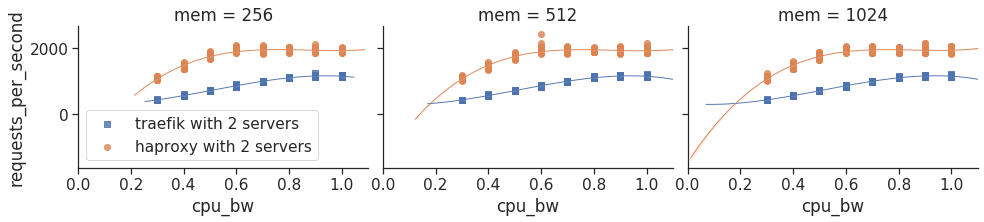

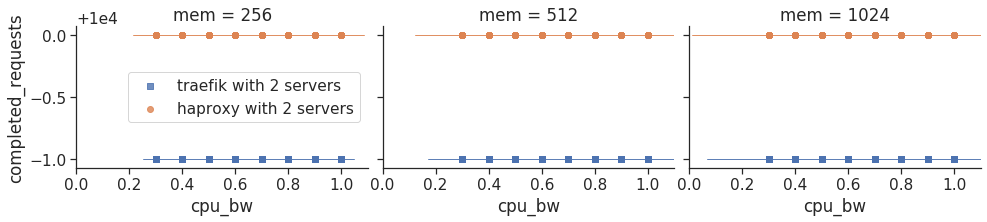

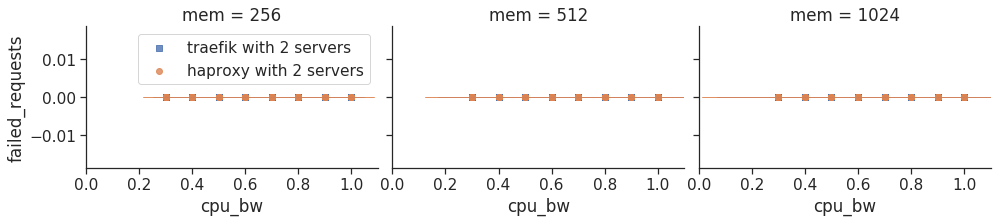

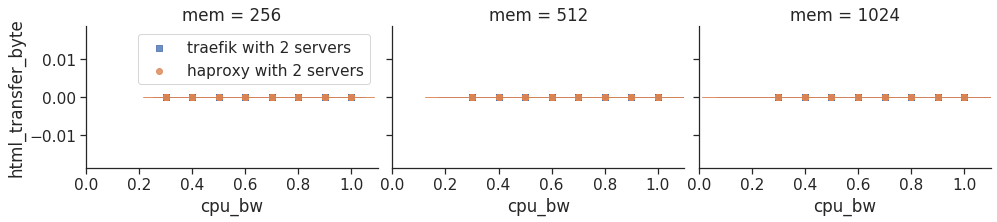

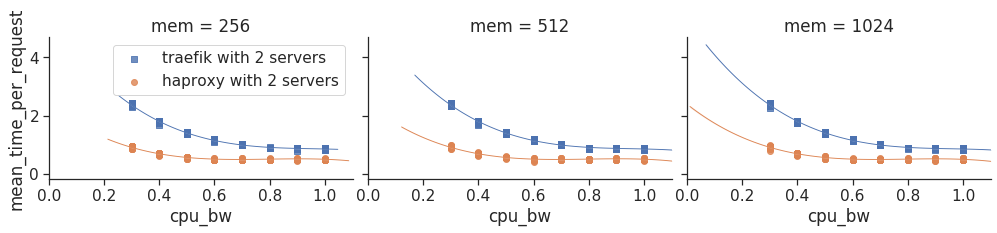

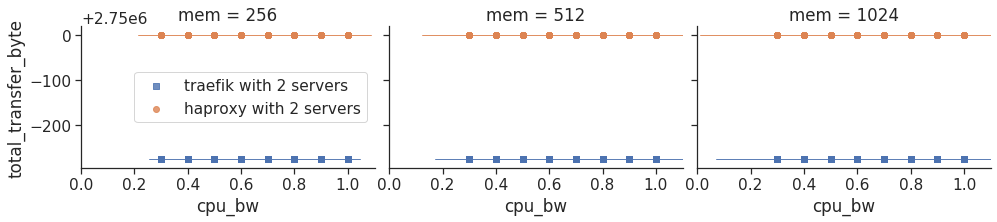

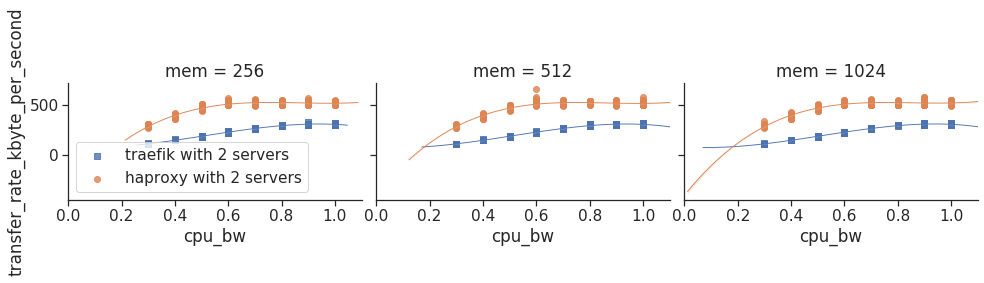

In [9]:
dff = df_combined.copy()
#dff = dff.loc[dff[x_col] >= .5]
sns.set(font_scale=1.4, style="ticks")

for i, m in enumerate(["requests_per_second", "completed_requests", "failed_requests", "html_transfer_byte", "mean_time_per_request", "total_transfer_byte", "transfer_rate_kbyte_per_second"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="vnf", col="mem", data=dff, height=3.4, aspect=1.4, markers=["s","o"], legend_out=False, order=3, truncate=False, x_jitter=.0, line_kws={"linewidth": .9})# palette=dict(suricata="b", snort2="g"))
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    g.set(xlim=(0.0, 1.1))

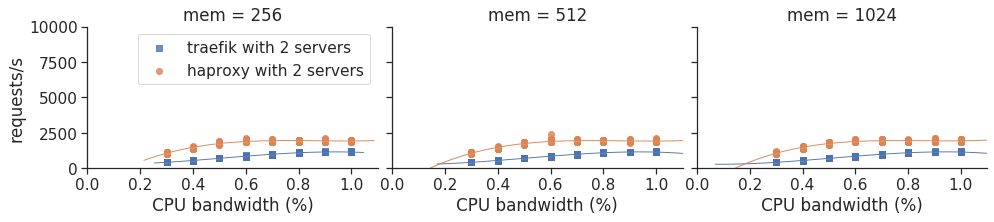

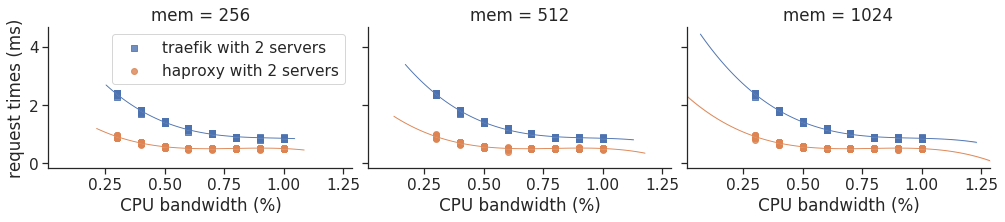

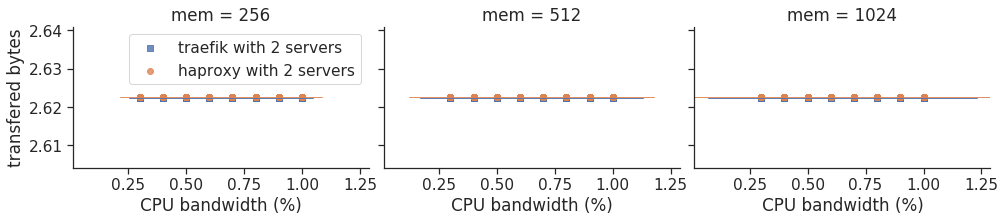

In [11]:
dff = df_combined.copy()
#dff = dff.loc[dff[x_col] >= .5]
dff = dff.loc[dff["mem"] < 1025]
dff["total_transfer_byte"] /= (1024 * 1024)  # MByte
sns.set(font_scale=1.4, style="ticks")

for i, m in enumerate(["requests_per_second", "mean_time_per_request", "total_transfer_byte"]):
    g = sns.lmplot(x="cpu_bw", y=m, hue="vnf", col="mem", data=dff, height=3.4, aspect=1.4, markers=["s","o"], legend_out=False, order=3, truncate=False, x_jitter=.0, line_kws={"linewidth": .9})# palette=dict(suricata="b", snort2="g"))
    g.fig.subplots_adjust(wspace=.05)
    g.axes.flat[0].get_legend().set_title("")
    
    if i == 0:
        g.set(xlim=(0.0, 1.1), ylim=(0, 10000))
        g.set_axis_labels("CPU bandwidth (%)", "requests/s")
        plt.savefig("/home/idli/results/analysis/plots/compare/compare_requests.pdf", dpi=300)
        plt.savefig("/home/idli/results/analysis/plots/compare/compare_requests.png", dpi=300)
    if i == 1:
       # g.set(xlim=(0.0, 1.1), ylim=(0, 1))
        g.set_axis_labels("CPU bandwidth (%)", "request times (ms)")
        plt.savefig("/home/idli/results/analysis/plots/compare/compare_requesttime.pdf", dpi=300)
        plt.savefig("/home/idli/results/analysis/plots/compare/compare_requesttime.png", dpi=300)
    if i == 2:
        #g.set(xlim=(0.0, 1.1), ylim=(0, 300))
        g.set_axis_labels("CPU bandwidth (%)", "transfered bytes")
        plt.savefig("/home/idli/results/analysis/plots/compare/compare_transferedbytes.pdf", dpi=300)
        plt.savefig("/home/idli/results/analysis/plots/compare/compare_transferedbytes.png", dpi=300)